In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from inpainting import InpaintNNF

In [2]:
def test_inpainting(src_path, mask_path, patch_w=7, max_pm_iters=5):
    src_img = cv2.imread(src_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = np.where(mask > 127, 1, 0).astype(np.uint8)

    inpainter = InpaintNNF(src_img, mask, patch_w=patch_w, max_pm_iters=max_pm_iters)
    inpainted_images = inpainter.inpaint()

    sources = []
    masks =[]

    for i in range(len(inpainter.pyramid)):
        sources.append(inpainter.pyramid[i][0])
        masks.append(inpainter.pyramid[i][1])

    return inpainted_images, sources, masks

## Example 1

In [3]:
src_path = "../images/balls.png"
mask_path = "../images/balls_mask.png"
inpainted_images, sources, masks = test_inpainting(src_path, mask_path)

Level 5 done in 0.1303098201751709 seconds.
Level 4 done in 0.9067769050598145 seconds.
Level 3 done in 3.959439754486084 seconds.
Level 2 done in 12.67015290260315 seconds.
Level 1 done in 38.584547996520996 seconds.


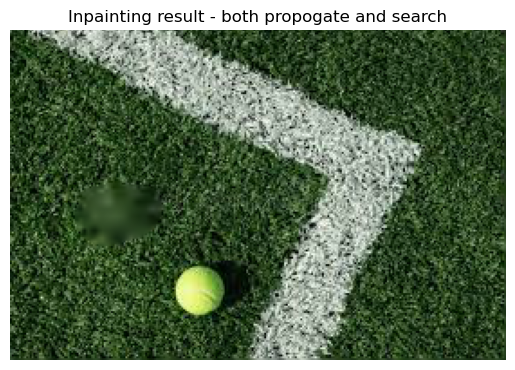

In [4]:
result = inpainted_images[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - both propogate and search')
plt.show()

In [3]:
src_path = "../images/balls.png"
mask_path = "../images/balls_mask.png"
inpainted_images_search, sources_search, masks_search = test_inpainting(src_path, mask_path)

Level 5 done in 0.035382986068725586 seconds.
Level 4 done in 0.2911570072174072 seconds.
Level 3 done in 1.6852662563323975 seconds.
Level 2 done in 6.2995500564575195 seconds.
Level 1 done in 24.174365997314453 seconds.


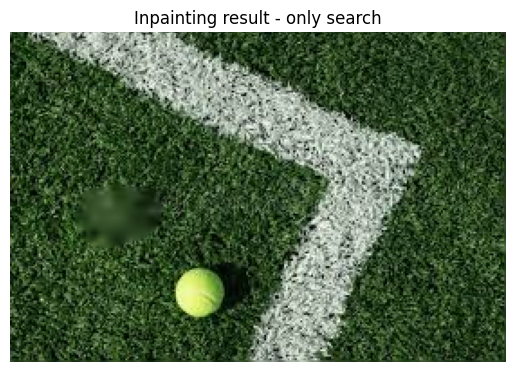

In [4]:
result = inpainted_images_search[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - only search')
plt.show()

In [3]:
src_path = "../images/balls.png"
mask_path = "../images/balls_mask.png"
inpainted_images_prop, sources_prop, masks_prop = test_inpainting(src_path, mask_path)

Level 5 done in 0.009961843490600586 seconds.
Level 4 done in 0.14566612243652344 seconds.
Level 3 done in 0.6801168918609619 seconds.
Level 2 done in 2.35758900642395 seconds.
Level 1 done in 16.438730001449585 seconds.


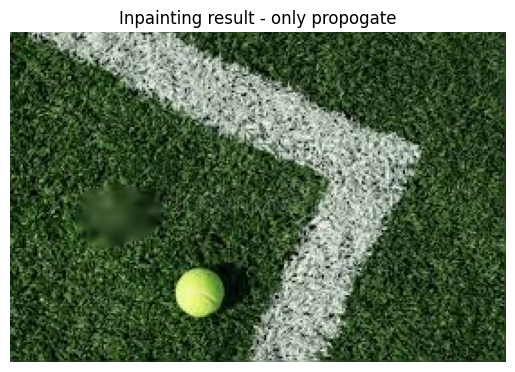

In [4]:
result = inpainted_images_prop[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - only propogate')
plt.show()

Time for inpainting using both search and propagate - 37 s  
Time for inpainting using only search - 32 s  
Time for inpainting using only propagate - 19 s  

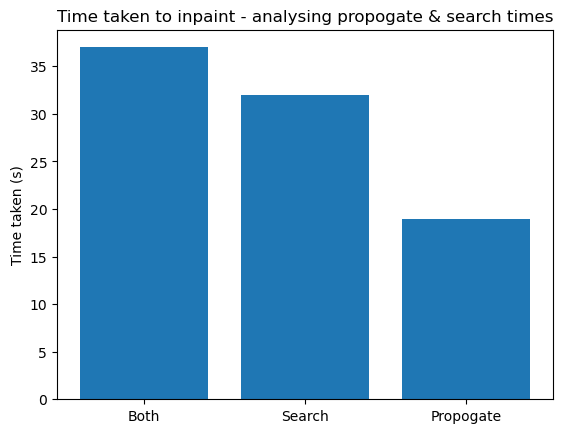

In [5]:
times = [37, 32, 19]
x_labels = ['Both', 'Search', 'Propogate']
plt.bar(range(len(times)), times)
plt.xticks(range(len(x_labels)), x_labels)
plt.ylabel('Time taken (s)')
plt.title('Time taken to inpaint - analysing propogate & search times')
plt.show()

## Example 2

In [6]:
src_path = "../images/photo_bomb.jpg"
mask_path = "../images/photo_bomb_mask.jpg"
inpainted_images, sources, masks = test_inpainting(src_path, mask_path)

Level 6 done in 0.01146697998046875 seconds.
Level 5 done in 0.07495808601379395 seconds.
Level 4 done in 0.7403850555419922 seconds.
Level 3 done in 3.557375907897949 seconds.
Level 2 done in 12.039027214050293 seconds.
Level 1 done in 46.38982081413269 seconds.


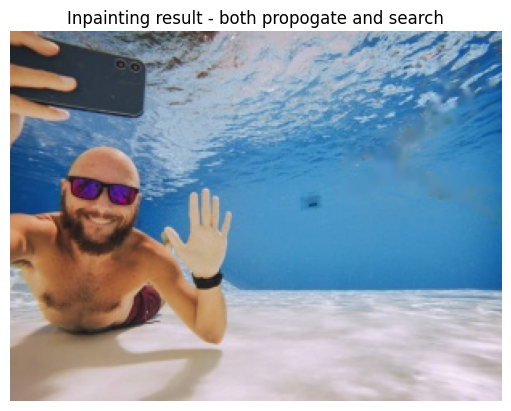

In [7]:
result = inpainted_images[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - both propogate and search')
plt.show()

In [3]:
src_path = "../images/photo_bomb.jpg"
mask_path = "../images/photo_bomb_mask.jpg"
inpainted_images_search, sources_search, masks_search = test_inpainting(src_path, mask_path)

Level 6 done in 0.010139703750610352 seconds.
Level 5 done in 0.05840420722961426 seconds.
Level 4 done in 0.5281360149383545 seconds.
Level 3 done in 2.7391629219055176 seconds.
Level 2 done in 9.576634883880615 seconds.
Level 1 done in 41.244863986968994 seconds.


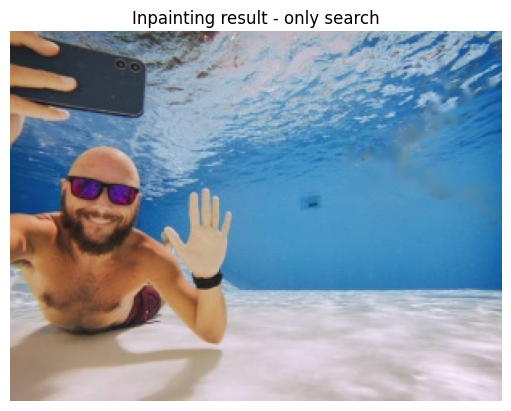

In [4]:
result = inpainted_images_search[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - only search')
plt.show()

In [4]:
src_path = "../images/photo_bomb.jpg"
mask_path = "../images/photo_bomb_mask.jpg"
inpainted_images_prop, sources_prop, masks_prop = test_inpainting(src_path, mask_path)

Level 6 done in 0.0034842491149902344 seconds.
Level 5 done in 0.02426886558532715 seconds.
Level 4 done in 0.25634312629699707 seconds.
Level 3 done in 1.0648348331451416 seconds.
Level 2 done in 3.900144100189209 seconds.
Level 1 done in 29.762046813964844 seconds.


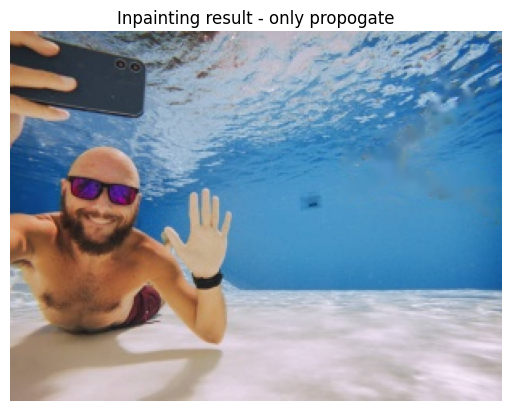

In [5]:
result = inpainted_images_prop[-1]
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Inpainting result - only propogate')
plt.show()

Time for inpainting using both search and propagate - 63 s  
Time for inpainting using only search - 54 s  
Time for inpainting using only propagate - 35 s  

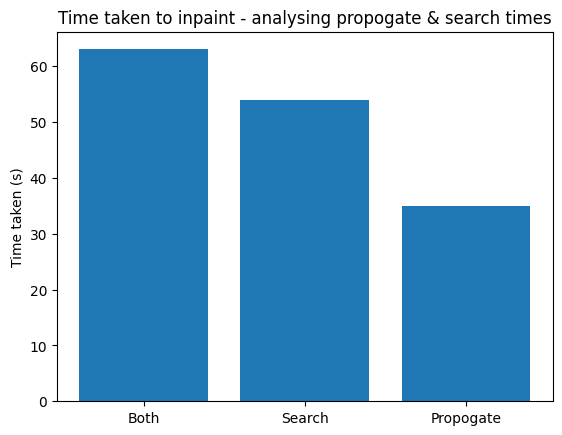

In [5]:
times = [63, 54, 35]
x_labels = ['Both', 'Search', 'Propogate']
plt.bar(range(len(times)), times)
plt.xticks(range(len(x_labels)), x_labels)
plt.ylabel('Time taken (s)')
plt.title('Time taken to inpaint - analysing propogate & search times')
plt.show()